In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
pd.set_option('display.max_columns', 50)

In [13]:
def process_qoutation(source):
    df=source.drop(['Закон основание','Ссылка на КС','Участники КС', 'Даты проведения', \
                     'Адрес поставки','Заказчика','ИНН заказчика', 'КПП заказчика', \
                    'Наименование победителя','ИНН победителя','КПП победителя', \
                    'Процент снижения','Ставка победителя'],axis=1)
    df['region']=source['КПП заказчика'] // 1e7
    df=df.drop(df[(df['Статус']=='Не состоялась') | (df['Статус']=='Снята с публикации')].index)
    df=df.drop('Статус',axis=1)
    df=df.drop(df[(df['Статус контракта']!="Исполнен") & (df['Статус контракта']!="Заключен")].index)
    df=df.drop(df[df.region.isna()].index)
    df['percent']=(source['Начальная стоимость']-source['Итоговоя стоимость'])/source['Начальная стоимость']*100
    df['day_of_week']=source['Дата начала'].dt.dayofweek
    df['week']=source['Дата начала'].dt.week
    df=df.drop(['Время начала','Дата окончания','Время окончания'],axis=1) #'Дата начала',
    df=df.drop(df[df['Идентификатор СТЕ'].isna()].index)
    return df

In [3]:
#quotation_file=pd.ExcelFile(r'C:\Users\Andrey\bsv\2\data\х КС 3.xlsx')
quotation_data=pd.read_excel(r'C:\Users\Andrey\bsv\2\data\х КС 3.xlsx')

In [4]:
quotation_data.head()

,Идентификатор,Закон основание,Начальная стоимость,Итоговоя стоимость,Даты проведения,Дата начала,Время начала,Дата окончания,Время окончания,Статус,Заказчика,ИНН заказчика,КПП заказчика,Ссылка на КС,Количество снижений,Процент снижения,Количество участников КС,Участники КС,Наименование победителя,ИНН победителя,КПП победителя,Ставка победителя,Номер оферты по итогам,Статус контракта,Реестровый номер контракта,Номер контракта,Идентификатор СТЕ,Адрес поставки,Количество товара,Начальная цена за единицу,Конечная цена,Наименование товара,Вид
0,133232,NaN,14720.0,14580.0,09.01.2018 - 10.01.2018,2018-01-09,12:00:20,2018-01-10,14:00:20,Не состоялась,Государственное бюджетное общеобразовательное ...,7.703777e+09,770301001.0,https://zakupki.mos.ru/auction/133232,2,NaN,1,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""МЕГА...",NaN,NaN,NaN,14580.0,31693871.0,NaN,NaN,NaN,NaN,NaN,386.0,38.14,37.77,NaN,Услуга
1,133243,NaN,94050.0,93580.0,09.01.2018 - 10.01.2018,2018-01-09,12:00:32,2018-01-10,14:00:32,Проведена,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ ...,7.720310e+09,772001001.0,https://zakupki.mos.ru/auction/133243,1,0.500000,1,"АО ""САХ РАЙОНА НОВОКОСИНО"";","АО ""САХ РАЙОНА НОВОКОСИНО""",7.720538e+09,772001001.0,93580.0,31691201.0,Заключен,18-1413233,2128/ТБО-2018,NaN,NaN,171.0,550.00,547.25,NaN,Услуга
2,133375,NaN,10800.0,10800.0,09.01.2018 - 10.01.2018,2018-01-09,16:56:18,2018-01-10,18:56:18,Не состоялась,Государственное бюджетное общеобразовательное ...,7.731243e+09,773101001.0,https://zakupki.mos.ru/auction/133375,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,600.00,NaN,NaN,Услуга
3,133386,NaN,399000.0,347260.0,09.01.2018 - 10.01.2018,2018-01-09,17:19:58,2018-01-10,19:22:57,Проведена,Государственное бюджетное общеобразовательное ...,7.721268e+09,772101001.0,https://zakupki.mos.ru/auction/133386,26,12.967419,3,"Общество с ограниченной ответственностью ""Альф...","Общество с ограниченной ответственностью ""Альф...",7.733303e+09,771701001.0,347260.0,31749589.0,Заключен,18-1415188,05/08к/18/1420,NaN,NaN,1.0,399000.00,347260.00,NaN,Услуга
4,133486,NaN,114220.0,114220.0,10.01.2018 - 11.01.2018,2018-01-10,12:45:01,2018-01-11,14:45:01,Не состоялась,Государственное бюджетное общеобразовательное ...,7.733672e+09,773301001.0,https://zakupki.mos.ru/auction/133486,1,NaN,1,ОАО 'РЭП №11' ('Южное Тушино');,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0,649.00,NaN,NaN,Услуга


In [14]:
pr_quot=process_qoutation(quotation_data)

In [15]:
pr_quot.head()

,Идентификатор,Начальная стоимость,Итоговоя стоимость,Дата начала,Количество снижений,Количество участников КС,Номер оферты по итогам,Статус контракта,Реестровый номер контракта,Номер контракта,Идентификатор СТЕ,Количество товара,Начальная цена за единицу,Конечная цена,Наименование товара,Вид,region,percent,day_of_week,week
100800,378292,3544.36,2994.73,2018-10-19,31,2,60349361.0,Заключен,18-2075782,2053-172-2018,1203443.0,1.0,3544.36,2994.73,"Кресло оператора BRABIX ""Saturn ER-400"", с под...",Товар,77.0,15.507172,4,42
101188,377037,8925.00,7245.00,2018-10-19,35,3,60319590.0,Заключен,18-2071382,536/18,1209487.0,300.0,15.32,12.44,Оптические диски,Товар,77.0,18.823529,4,42
101294,377037,8925.00,7245.00,2018-10-19,35,3,60319589.0,Заключен,18-2071382,536/18,1209486.0,300.0,14.43,11.71,Оптические диски,Товар,77.0,18.823529,4,42
101697,380149,11662.30,7310.80,2018-10-22,30,6,60404072.0,Заключен,18-2075817,18-2075817,1207700.0,15.0,96.80,60.68,"Мешки для мусора 120 л, черные, в рулоне 10 шт...",Товар,77.0,37.312537,0,43
101698,380149,11662.30,7310.80,2018-10-22,30,6,60404070.0,Заключен,18-2075817,18-2075817,1207497.0,20.0,46.79,29.33,"Мешки для мусора 30 л, черные, в рулоне 30 шт....",Товар,77.0,37.312537,0,43


In [7]:
quotation_data_2=pd.read_excel(r'C:\Users\Andrey\bsv\2\data\1я половина новых данных КС.xlsx')

In [16]:
quotation_data_2.head()

,Идентификатор,Закон основание,Начальная стоимость,Итоговоя стоимость,Даты проведения,Дата начала,Время начала,Дата окончания,Время окончания,Статус,Заказчика,ИНН заказчика,КПП заказчика,Ссылка на КС,Количество снижений,Процент снижения,Количество участников КС,Участники КС,Наименование победителя,ИНН победителя,КПП победителя,Ставка победителя,Номер оферты по итогам,Статус контракта,Реестровый номер контракта,Номер контракта,Идентификатор СТЕ,Адрес поставки,Количество товара,Начальная цена за единицу,Конечная цена,Наименование товара,Вид
0,680795,44-ФЗ,8000.00,7440.00,09.01.2020 - 10.01.2020,2020-01-09,09:00:00,2020-01-10,09:05:00,Проведена,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ ...,7723138571,772301001,https://zakupki.mos.ru/auction/680795,14,7.000000,6,"ООО ""МИСТЕР ПИКСЕЛЬ""; ООО ""ДОМ ПЕЧАТИ""; ООО ""Д...",ИП ЩЕРБАНЬ ЕВГЕНИЙ ВАЛЕНТИНОВИЧ,5.025061e+11,NaN,7440.00,792369194.0,Заключен,20-3187228,2020-01-01 00:00:00,18787563.0,"109649, г. Москва, 5-й квартал Капотни, д. 29",200.0,40.00,37.20,Изготовление календаря-домика,Работа
1,680865,44-ФЗ,25398.21,20024.31,09.01.2020 - 09.01.2020,2020-01-09,09:01:18,2020-01-09,15:01:18,Проведена,Государственное бюджетное общеобразовательное ...,7717082680,771701001,https://zakupki.mos.ru/auction/680865,42,21.158578,4,"ООО ""ГЛАВОФИССНАБ""; ООО ТК ""СНАБТОРГ""; ООО ""ПИ...","ООО ""ПИКСЕЛЬ""",7.724497e+09,772401001.0,20024.31,792425516.0,Заключен,20-3188306,2020-01-02 00:00:00,1242967.0,"129626, ГОРОД МОСКВА, УЛИЦА СТАРОАЛЕКСЕЕВСКАЯ, 1",45.0,161.00,126.98,Краски акварельные Гамма Чудо-краски 24цв б/к ...,Товар
2,680865,44-ФЗ,25398.21,20024.31,09.01.2020 - 09.01.2020,2020-01-09,09:01:18,2020-01-09,15:01:18,Проведена,Государственное бюджетное общеобразовательное ...,7717082680,771701001,https://zakupki.mos.ru/auction/680865,42,21.158578,4,"ООО ""ГЛАВОФИССНАБ""; ООО ТК ""СНАБТОРГ""; ООО ""ПИ...","ООО ""ПИКСЕЛЬ""",7.724497e+09,772401001.0,20024.31,792425517.0,Заключен,20-3188306,2020-01-02 00:00:00,1242664.0,"129626, ГОРОД МОСКВА, УЛИЦА СТАРОАЛЕКСЕЕВСКАЯ, 1",30.0,37.64,29.66,Тушь чертежная черная 70 мл. РДК ТШЧ-ч,Товар
3,680865,44-ФЗ,25398.21,20024.31,09.01.2020 - 09.01.2020,2020-01-09,09:01:18,2020-01-09,15:01:18,Проведена,Государственное бюджетное общеобразовательное ...,7717082680,771701001,https://zakupki.mos.ru/auction/680865,42,21.158578,4,"ООО ""ГЛАВОФИССНАБ""; ООО ТК ""СНАБТОРГ""; ООО ""ПИ...","ООО ""ПИКСЕЛЬ""",7.724497e+09,772401001.0,20024.31,792425513.0,Заключен,20-3188306,2020-01-02 00:00:00,1404043.0,"129626, ГОРОД МОСКВА, УЛИЦА СТАРОАЛЕКСЕЕВСКАЯ, 1",15.0,135.97,107.41,Гуашь Гамма Классическая белая титановая 220 мл,Товар
4,680865,44-ФЗ,25398.21,20024.31,09.01.2020 - 09.01.2020,2020-01-09,09:01:18,2020-01-09,15:01:18,Проведена,Государственное бюджетное общеобразовательное ...,7717082680,771701001,https://zakupki.mos.ru/auction/680865,42,21.158578,4,"ООО ""ГЛАВОФИССНАБ""; ООО ТК ""СНАБТОРГ""; ООО ""ПИ...","ООО ""ПИКСЕЛЬ""",7.724497e+09,772401001.0,20024.31,792425514.0,Заключен,20-3188306,2020-01-02 00:00:00,18870180.0,"129626, ГОРОД МОСКВА, УЛИЦА СТАРОАЛЕКСЕЕВСКАЯ, 1",54.0,100.87,79.45,Пастель масляная Луч Люкс 18 цветов,Товар


In [17]:
pr_quot2=process_qoutation(quotation_data_2)

In [18]:
pr_quot2.head()

,Идентификатор,Начальная стоимость,Итоговоя стоимость,Дата начала,Количество снижений,Количество участников КС,Номер оферты по итогам,Статус контракта,Реестровый номер контракта,Номер контракта,Идентификатор СТЕ,Количество товара,Начальная цена за единицу,Конечная цена,Наименование товара,Вид,region,percent,day_of_week,week
0,680795,8000.00,7440.00,2020-01-09,14,6,792369194.0,Заключен,20-3187228,2020-01-01 00:00:00,18787563.0,200.0,40.00,37.20,Изготовление календаря-домика,Работа,77,7.000000,3,2
1,680865,25398.21,20024.31,2020-01-09,42,4,792425516.0,Заключен,20-3188306,2020-01-02 00:00:00,1242967.0,45.0,161.00,126.98,Краски акварельные Гамма Чудо-краски 24цв б/к ...,Товар,77,21.158578,3,2
2,680865,25398.21,20024.31,2020-01-09,42,4,792425517.0,Заключен,20-3188306,2020-01-02 00:00:00,1242664.0,30.0,37.64,29.66,Тушь чертежная черная 70 мл. РДК ТШЧ-ч,Товар,77,21.158578,3,2
3,680865,25398.21,20024.31,2020-01-09,42,4,792425513.0,Заключен,20-3188306,2020-01-02 00:00:00,1404043.0,15.0,135.97,107.41,Гуашь Гамма Классическая белая титановая 220 мл,Товар,77,21.158578,3,2
4,680865,25398.21,20024.31,2020-01-09,42,4,792425514.0,Заключен,20-3188306,2020-01-02 00:00:00,18870180.0,54.0,100.87,79.45,Пастель масляная Луч Люкс 18 цветов,Товар,77,21.158578,3,2


In [19]:
pr_quot=pr_quot.append(pr_quot2,ignore_index=True)

In [22]:
pr_quot.head()

,Идентификатор,Начальная стоимость,Итоговоя стоимость,Дата начала,Количество снижений,Количество участников КС,Номер оферты по итогам,Статус контракта,Реестровый номер контракта,Номер контракта,Идентификатор СТЕ,Количество товара,Начальная цена за единицу,Конечная цена,Наименование товара,Вид,region,percent,day_of_week,week
0,378292,3544.36,2994.73,2018-10-19,31,2,60349361.0,Заключен,18-2075782,2053-172-2018,1203443.0,1.0,3544.36,2994.73,"Кресло оператора BRABIX ""Saturn ER-400"", с под...",Товар,77.0,15.507172,4,42
1,377037,8925.00,7245.00,2018-10-19,35,3,60319590.0,Заключен,18-2071382,536/18,1209487.0,300.0,15.32,12.44,Оптические диски,Товар,77.0,18.823529,4,42
2,377037,8925.00,7245.00,2018-10-19,35,3,60319589.0,Заключен,18-2071382,536/18,1209486.0,300.0,14.43,11.71,Оптические диски,Товар,77.0,18.823529,4,42
3,380149,11662.30,7310.80,2018-10-22,30,6,60404072.0,Заключен,18-2075817,18-2075817,1207700.0,15.0,96.80,60.68,"Мешки для мусора 120 л, черные, в рулоне 10 шт...",Товар,77.0,37.312537,0,43
4,380149,11662.30,7310.80,2018-10-22,30,6,60404070.0,Заключен,18-2075817,18-2075817,1207497.0,20.0,46.79,29.33,"Мешки для мусора 30 л, черные, в рулоне 30 шт....",Товар,77.0,37.312537,0,43


In [23]:
offer_data=pd.read_excel(r'C:\Users\Andrey\bsv\2\data\х Оферты.xlsx')

In [24]:
offer2_data=pd.read_excel(r'C:\Users\Andrey\bsv\2\data\1я половина новых оферт.xlsx')

In [52]:
def get_existing_offers(offs,id_ste,date):
    date_treshold=date + dt.timedelta(-14)
    return offs[(offs['Идентификатор СТЕ']==id_ste) \
                & (pd.DatetimeIndex(offs['Дата начала действия оферты'])<=date) \
               & (pd.DatetimeIndex(offs['Дата окончания действия оферты'])>=date_treshold)]

def get_existing_offers_count(offs,id_ste,date):
    return get_rows_count(get_existing_offers(offs,id_ste,date))

def get_rows_count(df):
    return df.shape[0]

In [50]:
offers=offer_data.append(offer2_data,ignore_index=True)

In [51]:
offers.head()

,Номер оферты,Регион поставщика,ИНН поставщика,КПП поставщика,Дата начала действия оферты,Дата окончания действия оферты,Идентификатор СТЕ,Стимость оферты,Вид продукции по классификатору портала,Адрес регистрации поставщика,ОКПД2,Регионы поставки
0,4198423-19,г Москва,7726651037,772701001.0,2019-10-21 00:00:00.000,2020-01-21 00:00:00.000,16548843,99990.00,Техническое обслуживание и текущий ремонт проч...,"г. Москва, улица Адмирала Руднева, дом 4, этаж...",NaN,г Москва; обл Московская;
1,4198343-19,г Москва,7726651037,772701001.0,2019-10-21 00:00:00.000,2020-01-21 00:00:00.000,16548180,99990.00,Техническое обслуживание и текущий ремонт проч...,"г. Москва, улица Адмирала Руднева, дом 4, этаж...",NaN,г Москва; обл Московская;
2,4851344-19,обл Московская,5029140070,502901001.0,2019-12-23 00:00:00.000,2020-03-23 00:00:00.000,1402614,10400.00,Техническое обслуживание прочего оборудования,"141033, Россия, Московская обл., г. Мытищи, у...",NaN,г Москва; обл Московская;
3,4375272-19,обл Московская,5029140070,502901001.0,2019-11-11 00:00:00.000,2020-02-11 00:00:00.000,1392730,13200.00,Техническое обслуживание и текущий ремонт проч...,"141033, Россия, Московская обл., г. Мытищи, у...",NaN,г Москва; обл Московская;
4,4308629-19,обл Самарская,631902289998,NaN,2019-10-31 00:00:00.000,2020-01-31 00:00:00.000,20133087,132.76,Крученая нерассасывающаяся полиамидная нить (э...,"г. Самара, ул. Ново-Садовая, д. 365, кв. 19.",NaN,г Москва; обл Московская;


In [98]:
def get_offers_count_series(df):
    result=list()
    for i in range(0,get_rows_count(df)):
        c=get_existing_offers_count(offers,df.loc[i]['Идентификатор СТЕ'],df.loc[i]['Дата начала'])
        result.append(c)
    return pd.Series(result)
        
        


In [ ]:
pr_quot['offers_count']=get_offers_count_series(pr_quot)

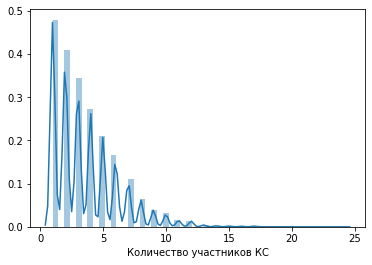

In [55]:
sns.distplot(pr_quot['Количество участников КС'])


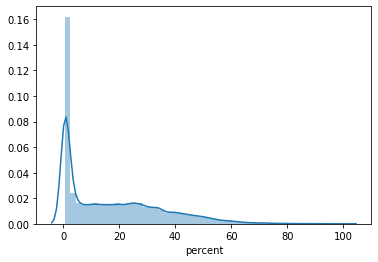

In [56]:
sns.distplot(pr_quot.percent)


In [173]:
pr_quot.percent.quantile(0.95)

50.5086596892624

In [184]:
pr_quot=pr_quot.drop(pr_quot[pr_quot.percent>50].index)
pr_quot=pr_quot.drop(pr_quot[pr_quot['Количество участников КС']>13].index)
X=pr_quot.drop(['Статус контракта','Реестровый номер контракта','Номер контракта','Наименование товара',\
              'Номер оферты по итогам','Идентификатор','Начальная цена за единицу', \
             'Начальная стоимость','Итоговоя стоимость',"Количество снижений", \
                "Количество участников КС", 'percent', 'Конечная цена'],axis=1)
y=pr_quot['Конечная цена']

In [189]:
X=pd.get_dummies(X).drop(['Вид_Работа'],axis=1)

In [186]:
y

0          2994.73
1            12.44
2            11.71
3            60.68
4            29.33
            ...   
251120     1696.78
251121     2856.00
251122      442.00
251123       84.36
251124    88873.40
Name: Конечная цена, Length: 237585, dtype: float64

In [224]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [233]:
X_learn, X_test, y_learn, y_test=train_test_split(X,y,test_size=0.33)

In [ ]:
clf=SVR(kernel='linear')
clf.fit(X_learn,y_learn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [229]:
lr_prediction=clf.predict(X_test)

In [230]:
result=pd.DataFrame(X_test)
result['real']=y_test
result['predicted']=lr_prediction

In [231]:
result

,Идентификатор СТЕ,Количество товара,region,day_of_week,week,Вид_Товар,Вид_Услуга,real,predicted
13050,1240095.0,140.0,77.0,2,25,1,0,28.25,113.222
27282,1223686.0,35.0,77.0,1,41,1,0,9.62,9.616
123157,19667122.0,32.0,77.0,3,49,1,0,621.84,593.692
52848,17743339.0,10.0,77.0,2,43,1,0,212.57,91653.556
56654,19706950.0,2.0,77.0,0,44,1,0,3482.50,1605.130
...,...,...,...,...,...,...,...,...,...
123481,21004830.0,50.0,77.0,3,49,1,0,18.80,6786.792
140174,20829387.0,15.0,77.0,0,51,0,1,6825.00,5778.400
132492,1238187.0,5.0,77.0,1,39,1,0,66.26,127.404
208366,17851573.0,6.0,77.0,1,38,1,0,690.85,535.378


In [232]:
pd.Series(np.abs(lr_prediction-y_test)).describe()

count    7.840400e+04
mean     1.175043e+04
std      3.764977e+04
min      0.000000e+00
25%      5.092850e+01
50%      5.899940e+02
75%      5.677202e+03
max      1.881639e+06
Name: Конечная цена, dtype: float64

In [ ]:
pr_quot.to_excel(r'C:\Users\Andrey\bsv\2\data\learn KS.xlsx')

In [77]:
contracts1_data=pd.read_excel(r'C:\Users\Andrey\bsv\2\data\х Контракты 2 1 часть.xlsx')

In [82]:
contracts2_data=pd.read_excel(r'C:\Users\Andrey\bsv\2\data\х Контракты 2 2 часть.xlsx')

In [83]:
contracts1_data.head(5)

,Способ закупки,Дата заключения,Заказчик,Регион заказчика,ИНН заказчика,КПП заказчика,Реестровый номер,Номер,Предмет,Наименование позиции,Количество,Цена за единицу,Идентификатор СТЕ,Поставщик,Регион поставщика,ИНН поставщика,КПП поставщика
0,Другое (импорт),2019-07-26 00:00:00.000,Государственное бюджетное образовательное учре...,г Москва,7715107749,771501001.0,2771510774919000064,962_2865,Поставка форменного обмундирования для кадет (...,NaN,34.0,937.03324,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""САВИ...",г Санкт-Петербург,7825058290,784001001.0
1,Другое (импорт),2019-07-26 00:00:00.000,Государственное бюджетное образовательное учре...,г Москва,7715107749,771501001.0,2771510774919000064,962_2865,Поставка форменного обмундирования для кадет (...,NaN,18.0,1087.96222,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""САВИ...",г Санкт-Петербург,7825058290,784001001.0
2,Другое (импорт),2019-07-26 00:00:00.000,Государственное бюджетное образовательное учре...,г Москва,7715107749,771501001.0,2771510774919000064,962_2865,Поставка форменного обмундирования для кадет (...,NaN,20.0,267.62850,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""САВИ...",г Санкт-Петербург,7825058290,784001001.0
3,Другое (импорт),2019-07-26 00:00:00.000,Государственное бюджетное образовательное учре...,г Москва,7715107749,771501001.0,2771510774919000064,962_2865,Поставка форменного обмундирования для кадет (...,NaN,34.0,792.72853,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""САВИ...",г Санкт-Петербург,7825058290,784001001.0
4,Другое (импорт),2019-07-26 00:00:00.000,Государственное бюджетное образовательное учре...,г Москва,7715107749,771501001.0,2771510774919000064,962_2865,Поставка форменного обмундирования для кадет (...,NaN,54.0,248.41333,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""САВИ...",г Санкт-Петербург,7825058290,784001001.0


In [84]:
contracts2_data.head(5)

,Способ закупки,Дата заключения,Заказчик,Регион заказчика,ИНН заказчика,КПП заказчика,Реестровый номер,Номер,Предмет,Наименование позиции,Количество,Цена за единицу,Идентификатор СТЕ,Поставщик,Регион поставщика,ИНН поставщика,КПП поставщика
0,Другое (импорт),2019-04-29 00:00:00.000,Государственное бюджетное общеобразовательное ...,г Москва,7722006029,772201001.0,2772200602919000064,1228-АТО-19-20,Оказание услуг по обслуживанию инженерных сист...,Техническое обслуживание системы приточно-вытя...,6008.4,11.51,NaN,"Общество с ограниченной ответственностью ""МЕРК...",обл Московская,5027238257,502701001.0
1,Другое (импорт),2019-10-21 00:00:00.000,Государственное бюджетное учреждение города Мо...,г Москва,9710025951,771001001.0,2971002595119000064,373500001519000000,Поставка канцелярских товаров,"Обложка для переплета, картон",10.0,318.92,NaN,Общество с ограниченной ответственностью «НАВИ...,г Москва,7713449810,771301001.0
2,Другое (импорт),2019-10-21 00:00:00.000,Государственное бюджетное учреждение города Мо...,г Москва,9710025951,771001001.0,2971002595119000064,373500001519000000,Поставка канцелярских товаров,"Обложка для переплета, картон",130.0,567.24,NaN,Общество с ограниченной ответственностью «НАВИ...,г Москва,7713449810,771301001.0
3,Другое (импорт),2019-10-21 00:00:00.000,Государственное бюджетное учреждение города Мо...,г Москва,9710025951,771001001.0,2971002595119000064,373500001519000000,Поставка канцелярских товаров,Ручка канцелярская,300.0,3.75,NaN,Общество с ограниченной ответственностью «НАВИ...,г Москва,7713449810,771301001.0
4,Другое (импорт),2019-10-21 00:00:00.000,Государственное бюджетное учреждение города Мо...,г Москва,9710025951,771001001.0,2971002595119000064,373500001519000000,Поставка канцелярских товаров,Клейкие закладки пластиковые,700.0,56.66,NaN,Общество с ограниченной ответственностью «НАВИ...,г Москва,7713449810,771301001.0


In [85]:
contracts_data=contracts1_data.append(contracts2_data, ignore_index = True)

In [94]:
contracts_data=contracts_data.drop(['Заказчик','Регион заказчика','ИНН заказчика','КПП заказчика', \
                    'Поставщик','Регион поставщика','ИНН поставщика','КПП поставщика'],axis=1)

In [95]:
contracts_data.to_csv(r'C:\Users\Andrey\bsv\2\data\контракты.csv')